In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Загрузка данных

Полученный датасет имеет 50000 строк и 28 столбцов. Каждая строка представляет клиента банка, а в каждом столбце содержатся количественные или категориальные признаки для каждого клиента.

In [475]:
data = pd.read_csv('Desktop/test_cluster.csv', sep=';',engine='python')

In [476]:
data.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [477]:
data.shape

(50000, 28)

In [478]:
data.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,2.600832e+04,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,4.359979e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,3.162002e+04,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,9.060000e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


###  Пропущенные значения

В датасете несколько столбцов, в которых отсутствуют значения. Признак «gender» имеет 723 пропущенных значения. Столбец «loan_to_deposit» имеет 46180 пропущенных значений. В признаке «Avg_trx» 17872 пропущенных значения, в столбце «avgtrx_to_balance» — 18485, в «nbi» 2431.

In [479]:
data.isnull().sum()

age                        0
gender                   723
city_type                  0
full_mob                   0
ml_balance                 0
cl_balance_0m              0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
income                     0
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
min_td_balance_1q          0
max_td_balance_1q          0
avg_td_balance_1Y          0
min_loan_balance_1q        0
max_loan_balance_1q        0
avg_loan_balance_1Y        0
min_cl_balance_1q          0
max_cl_balance_1q          0
avg_cl_balance_1Y          0
loan_to_deposit        46180
Avg_trx                17872
avgtrx_to_balance      18485
nbi                     2431
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

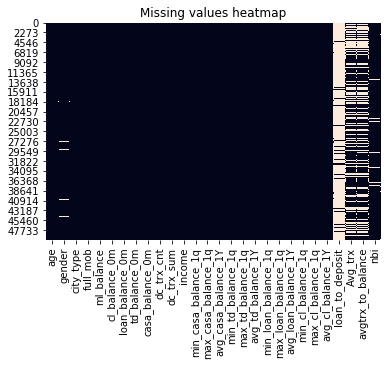

In [480]:
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

### Категориальные признаки

Чтобы определить категориальные признаки, посмотрим на количество уникальных значений в каждом столбце. Признак «gender» имеет два возможных значения, а «city_type» имеет пять возможных значений.

In [481]:
data.nunique()

age                       84
gender                     2
city_type                  5
full_mob                 185
ml_balance               575
cl_balance_0m           8177
loan_balance_0m        11077
td_balance_0m           1434
casa_balance_0m        36395
dc_trx_cnt              1204
dc_trx_sum             29266
income                 19630
min_casa_balance_1q    31824
max_casa_balance_1q    40854
avg_casa_balance_1Y    44790
min_td_balance_1q       1307
max_td_balance_1q       1532
avg_td_balance_1Y       2455
min_loan_balance_1q    10385
max_loan_balance_1q    11779
avg_loan_balance_1Y    13105
min_cl_balance_1q       7766
max_cl_balance_1q       8444
avg_cl_balance_1Y       9530
loan_to_deposit          346
Avg_trx                29748
avgtrx_to_balance      31399
nbi                    47242
dtype: int64

In [482]:
print("Уникальные значения в колонках с категориальными признаками:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Уникальные значения в колонках с категориальными признаками:
gender : [nan 'М' 'F']
city_type : ['<100' 'Mega' '100-500' '1M+' '500-1000']


### Заполнение пропущенных данных



#### 1. gender - пол клиента

723 пропущенных значения, в датасете примерно одинаковое количество мужчин и женщин


In [483]:
data['gender'].value_counts()

М    25403
F    23874
Name: gender, dtype: int64

В разных возрастных категориях примерно одинаковое число мужчин и женщин

In [484]:
def age_category(age):
    
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [485]:
data['age_category'] = data['age'].apply(age_category)

In [486]:
pd.crosstab(data['age_category'], data['gender'], margins=True)

gender,F,М,All
age_category,,,
1,4385,4596,8981
2,14990,16254,31244
3,4499,4553,9052
All,23874,25403,49277


Заполним недостающие значения столбца "gender" предыдущим заполненным значением, чтобы соотношение между числом мужчин и женщиин сохранилось


In [487]:
data['gender'] = data['gender'].fillna(method='ffill')
data['gender'] = data['gender'].fillna('М')

In [488]:
data.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_category
0,71,М,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3
1,49,М,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,2
2,56,М,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,3
3,47,М,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,2
4,74,М,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,3


In [489]:
data['gender'].value_counts()

М    25820
F    24180
Name: gender, dtype: int64

#### 2. loan_to_deposit 

46180 пропущенных значения, то есть это значение отсутствует почти у всех клиентов, я бы заполнила все недостающие значения нулями. Есть вариант заполнить средним значением по признаку, но вряд ли у всех клиентов есть заём на депозит, то есть эта информация была бы заведомо ложная.Тем более большая часть заполненных значений - нули. 


In [490]:
data['loan_to_deposit'] = data['loan_to_deposit'].fillna(0)

#### 3. Avg_trx средний размер транзакции 

Это значение высчитывается по следующей формуле: dc_trx_sum / dc_trx_cnt


In [491]:
data['Avg_trx'] = data['dc_trx_sum'] / data[data['dc_trx_cnt'] != 0]['dc_trx_cnt']

Это значение уже высчитано там, где dc_trx_cnt не равен 0.
Если нет трат по картам, то средний размер транзакции будет равен 0.

In [492]:
data['Avg_trx'] = data['Avg_trx'].fillna(0)

#### 4. avgtrx_to_balance 
Это значение высчитывается по следующей формуле: Avg_trx / avg_casa_balance_1Y

In [493]:
data['avgtrx_to_balance'] = data['Avg_trx']/data[data['avg_casa_balance_1Y'] != 0]['avg_casa_balance_1Y']
data['avgtrx_to_balance'] = data['avgtrx_to_balance'].fillna(0)

#### 5. nbi доход от клиента без OPEX
2431 пропущенных значения, заполняю медианой по столбцу 

In [495]:
data['nbi'] = data['nbi'].fillna(data['nbi'].median())

### Кодирование категориальных признаков

In [496]:
from sklearn.preprocessing import LabelEncoder

Теперь мужскому полу будет соответствовать 1, а женскому 0.

In [497]:
data['gender'] = LabelEncoder().fit_transform(data['gender'])

In [498]:
data['city_type'].value_counts()

<100        15421
100-500     10727
Mega         8954
1M+          7908
500-1000     6990
Name: city_type, dtype: int64

"<100 " - 3, "100-500" - 0, "Mega" - 4, "1M+" - 1, "500-1000" - 2

In [499]:
data['city_type'] = LabelEncoder().fit_transform(data['city_type'])

In [501]:
data.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_category
0,71,1,3,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,1379.603831,3
1,49,1,4,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,28.762952,2
2,56,1,4,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,854.67,0.083467,1973.335539,3
3,47,1,4,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,364.008556,2
4,74,1,4,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,6651.416562,3


### Анализ данных

In [510]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="full_mob",y="loan_balance_0m", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="age",y="loan_balance_0m", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="age",y="full_mob", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

In [511]:
color = {1: 'green',0:'red'}

Посмотрим на зависимости величины кредитов от длитености взаимоотношений с банком, величины кредитов от возраста и длительность отношений с банком от возраста

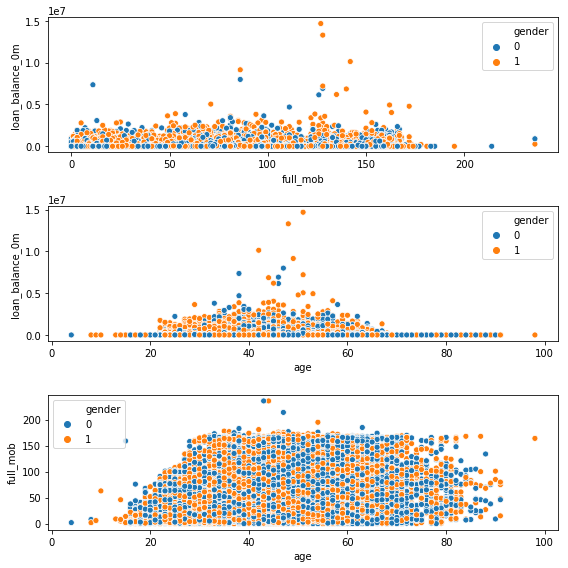

In [513]:
scatters(data, h=data["gender"], pal=None)

Можно сделать вывод, что самые крупные кредиты взяты мужчинами, среди молодых больше кредитов у мужчин, но в среднем не наблюдается зависимости между полом и длительностью контакта с банком и размером кредитов.

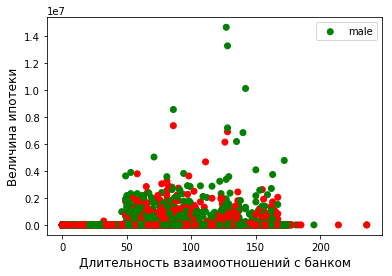

In [515]:
fig, ax = plt.subplots()
plt.xlabel('Длительность взаимоотношений с банком', fontsize=12)
plt.ylabel('Величина ипотеки', fontsize=12)
ax.scatter(data["full_mob"], data["ml_balance"],c=data["gender"].apply(lambda x: color[x]))
plt.gca().legend(('male','female'))
plt.show()

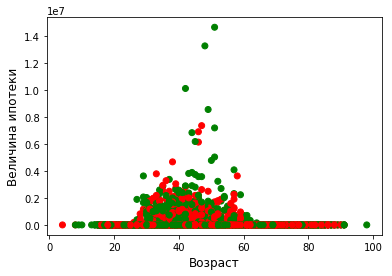

In [516]:
fig, ax = plt.subplots()
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Величина ипотеки', fontsize=12)
ax.scatter(data["age"],data["ml_balance"],c=data['gender'].apply(lambda x: color[x]))
plt.show()

У ипотеки примерно такие же зависимости, как и у кредитов. Ипотеку берут и женщины, и мужчины от 26 до 64 лет (пик от 38 до 45ти), до 30 лет - в основном мужчины. Дорогие ипотеки берут в основном мужчины.

На следующем графике видим, что самые большые заёмы у людей из крупных городов, и, наоборот, самых маленьких, но в среднем ситуация мало зависит от размера города.

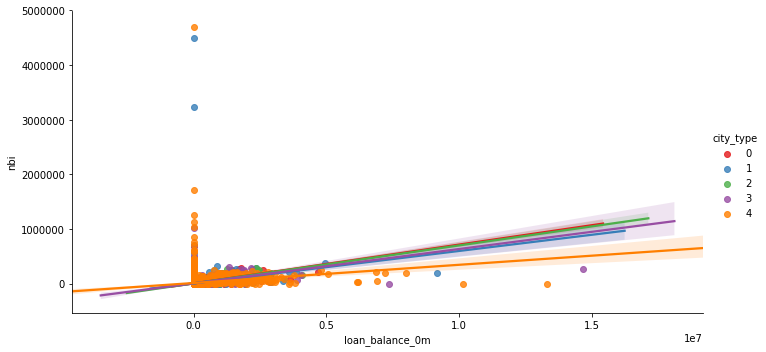

In [270]:
sns.lmplot(x="loan_balance_0m",y="nbi", hue="city_type", data=data, palette="Set1", aspect=2)
plt.show()

In [258]:
import scipy.stats as stats

Проверим линейную корелляцию между средними показателями по счетам за год и доходом от клиента. Значение Пирсона получается 0.78, что говорит о сильной корелляции (чем больше один признак, тем больше другой).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


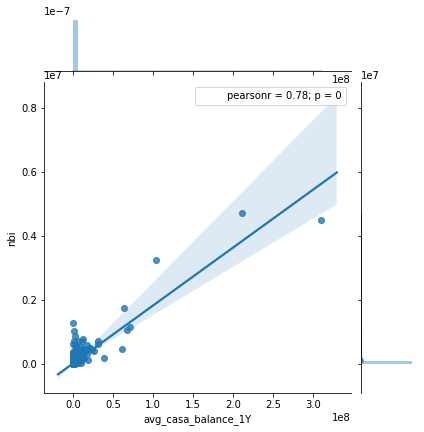

In [261]:
r1 = sns.jointplot(x="avg_casa_balance_1Y",y="nbi", data=data, kind="reg")
r1.annotate(stats.pearsonr)
plt.show()

Добавим столбец, который показывает, есть ли кредиты у человека

In [519]:
data['n_loans'] = np.where(data['loan_balance_0m']!=0, 1, 0)

In [522]:
data.tail()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_category,n_loans
49995,57,0,3,97,0.0,0.0,0.00,1247018.0,0.88,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,13775.933155,3,0
49996,58,0,4,34,0.0,0.0,0.00,1000000.0,0.00,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,8247.466438,3,0
49997,34,1,1,21,0.0,0.0,0.00,0.0,6450.93,73,...,0.000000,0.0,0.0,0.0,0.0,1621.347671,0.179949,1973.128711,2,0
49998,43,1,3,52,0.0,0.0,39318.52,0.0,4101.12,0,...,63442.406667,0.0,0.0,0.0,0.0,0.000000,0.000000,5101.543269,2,1
49999,32,0,3,5,0.0,0.0,0.00,0.0,389.41,120,...,0.000000,0.0,0.0,0.0,0.0,1383.538083,0.151800,781.388873,2,0


Больше всего людей, которые берут кредиты, в городах с численностью меньше 100 тыс человек 

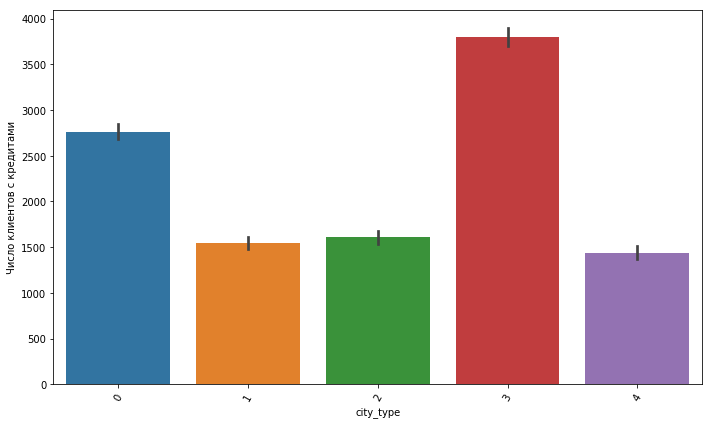

In [525]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x="city_type",y="n_loans",data=data, estimator=sum)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Число клиентов с кредитами")
plt.tight_layout()

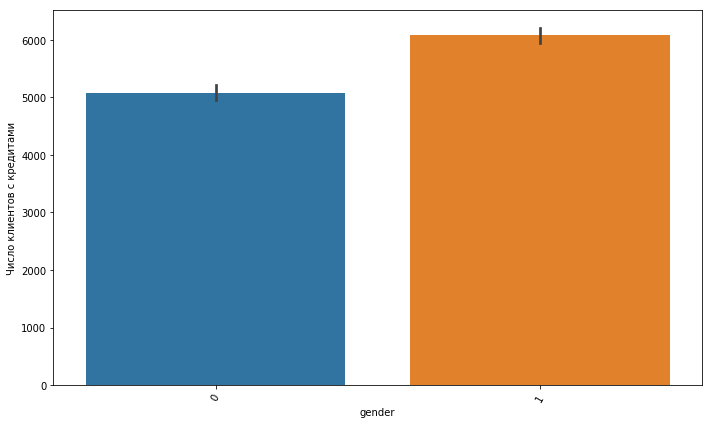

In [526]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x="gender",y="n_loans",data=data, estimator=sum)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Число клиентов с кредитами")
plt.tight_layout()

Как и ожидалось, больше кредитов у людей среднего возраста.

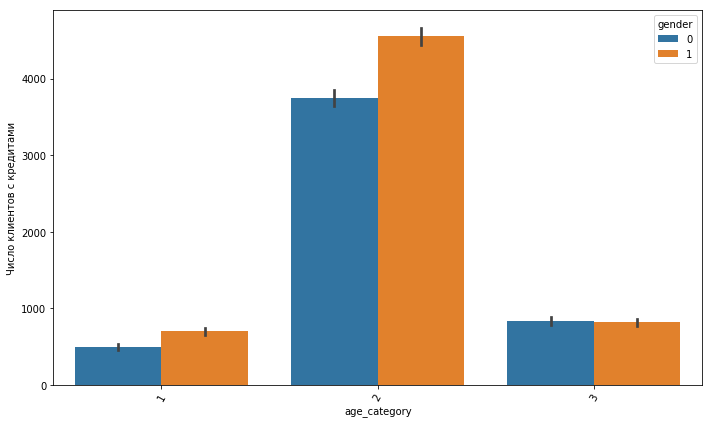

In [529]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x="age_category",y="n_loans",data=data, estimator=sum, hue = 'gender')
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Число клиентов с кредитами")
plt.tight_layout()

### Кластеризация

In [8]:
from sklearn.cluster import KMeans

Для удобства визуализации уберём клиентов с сильно большими показателями по счетам за год

In [530]:
df_short = data.drop(data[data['avg_casa_balance_1Y'] > 30000000].index)
df_short.reset_index(inplace=True) 

In [531]:
df_short.head()

,index,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_category,n_loans
0,0,71,1,3,103,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,1379.603831,3,0
1,1,49,1,4,81,0.0,0.0,0.0,0.0,3272.9367,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,28.762952,2,0
2,2,56,1,4,81,0.0,0.0,0.0,0.0,6249.7550,...,0.0,0.0,0.0,0.0,0.0,854.67,0.083467,1973.335539,3,0
3,3,47,1,4,81,0.0,0.0,0.0,0.0,14354.9370,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,364.008556,2,0
4,4,74,1,4,81,0.0,0.0,0.0,0.0,91511.7691,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,6651.416562,3,0


In [360]:
df_short.columns

Index(['index', 'age', 'gender', 'city_type', 'full_mob', 'ml_balance',
       'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'min_td_balance_1q',
       'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'avg_loan_balance_1Y', 'min_cl_balance_1q',
       'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx',
       'avgtrx_to_balance', 'nbi', 'age_category'],
      dtype='object')

Для кластеризации с помощью алгоритма k-means создадим подмножество более значимых признаков

In [558]:
selected_cols = ["age", "ml_balance", "loan_balance_0m", "avg_casa_balance_1Y", "nbi"]
cluster_data = df_short.loc[:,selected_cols]

In [559]:
from sklearn.preprocessing import StandardScaler

In [560]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

Выбор числа кластеров.

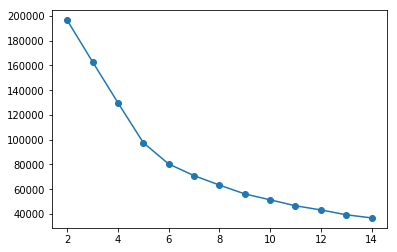

In [561]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

#### k-means для k=5

In [562]:
kmeans_sel = KMeans(n_clusters=5, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [563]:
color_Cluster = {0: 'red',1:'blue', 2:'green', 3:'black', 4:'orange'}

In [564]:
clustered_data.columns

Index(['age', 'ml_balance', 'loan_balance_0m', 'avg_casa_balance_1Y', 'nbi',
       'Cluster'],
      dtype='object')

#### Оригинальное распределение

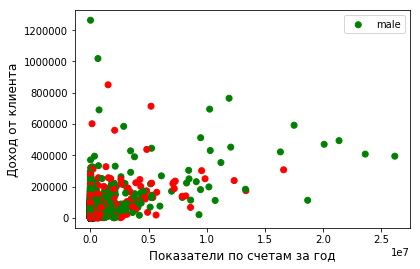

In [567]:
fig, ax = plt.subplots()
plt.xlabel('Показатели по счетам за год', fontsize=12)
plt.ylabel('Доход от клиента', fontsize=12)
ax.scatter(df_short["avg_casa_balance_1Y"], df_short["nbi"],c=df_short['gender'].apply(lambda x: color[x]))
plt.gca().legend(('male','female'))
plt.show()

#### Визуализация кластеров

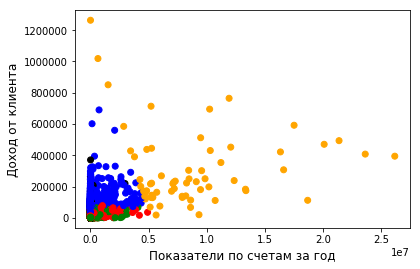

In [568]:
fig, ax = plt.subplots()
plt.xlabel('Показатели по счетам за год', fontsize=12)
plt.ylabel('Доход от клиента', fontsize=12)
ax.scatter(clustered_data['avg_casa_balance_1Y'],clustered_data['nbi'],c=clustered_data['Cluster'].apply(lambda x: color_Cluster[x]))
plt.show()

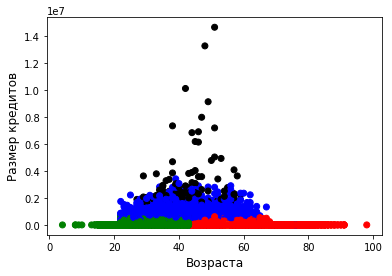

In [569]:
fig, ax = plt.subplots()
plt.xlabel('Возраста', fontsize=12)
plt.ylabel('Размер кредитов', fontsize=12)
ax.scatter(clustered_data['age'],clustered_data['loan_balance_0m'],c=clustered_data['Cluster'].apply(lambda x: color_Cluster[x]))
plt.show()

In [570]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,age,ml_balance,loan_balance_0m,avg_casa_balance_1Y,nbi
Cluster,,,,,
0,54.4,1331.8,25715.5,38674.7,6899.9
1,42.2,67675.2,719323.8,105172.4,76463.7
2,32.3,1076.9,23037.3,22443.5,4538.1
3,42.2,2796401.0,2967333.0,45568.1,78038.4
4,49.4,0.0,0.0,8624899.9,304287.5


#### Описание кластеров

4 - наибольшая доходность от клиентов, нет кредитов и ипотек, но наибольшие показатели по счетам

3 - большая сумма ипотеки и кредитов, остальные траты небольшие, хороший доход от клиента

1 - средние суммы по ипотеке и кредитам (меньше, чем в кластере 3) и по другим счетам, хороший доход от клиента (сравнимый с кластером 3)

0 и 2 - небольшие суммы по и по кредитам,и по ипотеке, и остальные -> небольшой доход от клиента, различие кластеров в возрастных категориях клиентов
